# Continuum: Simple Management of Complex Continual Learning Scenarios
> A library to create continual learning scenarios with PyTorch

- toc: false 
- badges: true
- comments: true
- categories: [continual learning, pytorch]
- author: "<a href='https://arthurdouillard.com/'>Arthur Douillard</a> and <a href='https://tlesort.github.io'>Timothée Lesort</a>"
- image: https://raw.githubusercontent.com/Continvvm/continuum/master/images/Blogpost/cl_scenario.png?tr=w-1200,h-628,fo-auto

## Introduction

Continual Learning is a field of machine learning where the data distribution changes through time. For instance, instead of learning to classify all animals in the world at once, the model learns to classify them 10 by 10. To experiment in this setting, the data management is quite different from usual machine learning.

[Continuum](https://github.com/Continvvm/continuum) is a Python based library that proposes various data loaders for Continual Learning scenarios. It is designed to prevent researchers from spending time on designing classical data loaders and eliminate time-consuming errors. With [Continuum](https://github.com/Continvvm/continuum), it is possible to focus on the model design using multiple scenarios directly. It also includes tools fro logging algorithm results and compute continual learning metrics.

Our philosophy is inspired by UNIX's: we aim to do few things but do it well without too many assumptions about your research code. [Continuum](https://github.com/Continvvm/continuum) is designed to be pluggable seamlessly in any codebase.

- [Github repository](https://github.com/Continvvm/continuum)
- [Website documentation](https://continuum.readthedocs.io/en/latest/index.html)


## Installation
The library can be installed easily thanks to pip.

In [1]:
%%capture
!pip install continuum

# Create your First Scenario

One of the simplest scenarios that continuum proposes is the split MNIST.

This scenario consists of learning MNIST by part. We split MNIST into several parts that contain different classes, i.e. we learn incrementally new classes. In our case, we see at first only images of "0" and "1", then images of "2" and "3", etc. Continuum proposes to use the class `ClassIncremental` to split the MNIST dataset into tasks.



First, we create an dataset object that contains the MNIST dataset.

In [2]:
%%capture
from six.moves import urllib    
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)
from continuum.datasets import MNIST   # Import the dataset
dataset = MNIST(".", download=True, train=True)

Then, we create a scenario of 5 tasks containing each the data of two classes.


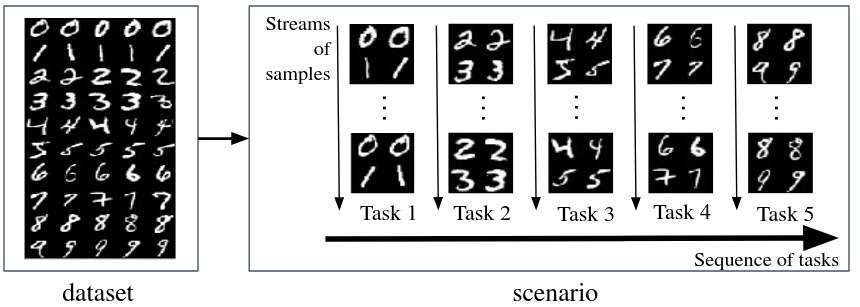


In [3]:
from continuum import ClassIncremental # Import the scenarios template

# Create the scenario object. 
scenario = ClassIncremental(
    dataset,
    increment=2  # each new task contains, 2 classes
)

print("******************************************")
print(f"Number of classes: {scenario.nb_classes}.")
print(f"Number of tasks: {scenario.nb_tasks}.")
print("******************************************")

******************************************
Number of classes: 10.
Number of tasks: 5.
******************************************


The scenario object can be iterate into the 5 `TaskSets` that can be used with a Pytorch dataloader.

Each batch contains three kinds of tensors:
- `x`: the pixels of the images
- `y`: the labels of the images (i.e. 0, 1, 2, 3, 4, etc.)
- `t`: the task identifiers of the images. 

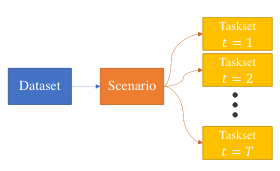

**********************
Task       : 0
Data Shape : torch.Size([10, 1, 28, 28])
Labels     : tensor([0, 1, 1, 1, 1, 0, 1, 1, 0, 0])
Task label : tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
**********************
Task       : 1
Data Shape : torch.Size([10, 1, 28, 28])
Labels     : tensor([2, 3, 3, 3, 2, 2, 3, 2, 3, 3])
Task label : tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
**********************
Task       : 2
Data Shape : torch.Size([10, 1, 28, 28])
Labels     : tensor([5, 4, 4, 5, 4, 4, 5, 5, 4, 4])
Task label : tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
**********************
Task       : 3
Data Shape : torch.Size([10, 1, 28, 28])
Labels     : tensor([6, 7, 6, 7, 6, 6, 7, 6, 7, 7])
Task label : tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
**********************
Task       : 4
Data Shape : torch.Size([10, 1, 28, 28])
Labels     : tensor([9, 8, 9, 9, 8, 9, 8, 9, 9, 8])
Task label : tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4])


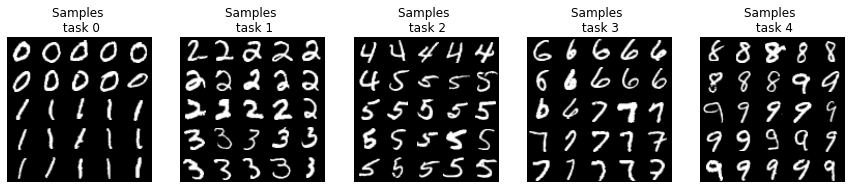

In [4]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, len(scenario), figsize=(15,3))

for task_id, taskset in enumerate(scenario):

    # plot samples for each tasks
    ind_plot = 100 + len(scenario)*10 + task_id+1
    plt.subplot(ind_plot)
    taskset.plot(nb_samples=25)
    plt.title(f"Samples \n task {task_id}")

    # convert taskset into a the data loader for one task
    loader = DataLoader(taskset, batch_size=10)
    for x, y, t in loader:
        # x: data, y: label, t:task label
        # Train your model here
        print("**********************")
        print(f"Task       : {task_id}")
        print(f"Data Shape : {x.shape}")
        print(f"Labels     : {y}")
        print(f"Task label : {t}")

        break # we do not want to iterate through all the data in this example

Note that you can index the scenario object to select a specific taskset or set of tasksets:

```python
task_set = scenario[1]  # Second task
task_set = scenario[:3]  # First three tasks
task_set = scenario[::2]  # All even tasks
task_set = scenario[:]  # All tasks 
```

The `ClassIncremental` scenario, as most proposed scenarios, can accept different datasets than MNIST. Here is a list of the existing datasets:


<table>
<col width="29%" />
<col width="16%" />
<col width="16%" />
<col width="26%" />
<col width="11%" />
<thead>
<tr class="header">
<th align="left">Name</th>
<th align="left">Nb classes</th>
<th align="left">Image Size</th>
<th align="left">Automatic Download</th>
<th align="left">Type</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td align="left"><strong>MNIST</strong></td>
<td align="left">10</td>
<td align="left">28x28x1</td>
<td align="left">YES</td>
<td align="left">Images</td>
</tr>
<tr class="even">
<td align="left"><strong>Fashion MNIST</strong></td>
<td align="left">10</td>
<td align="left">28x28x1</td>
<td align="left">YES</td>
<td align="left">Images</td>
</tr>
<tr class="odd">
<td align="left"><strong>KMNIST</strong></td>
<td align="left">10</td>
<td align="left">28x28x1</td>
<td align="left">YES.</td>
<td align="left">Images</td>
</tr>
<tr class="even">
<td align="left"><strong>EMNIST</strong></td>
<td align="left">10</td>
<td align="left">28x28x1</td>
<td align="left">YES</td>
<td align="left">Images</td>
</tr>
<tr class="odd">
<td align="left"><strong>QMNIST</strong></td>
<td align="left">10</td>
<td align="left">28x28x1</td>
<td align="left">YES</td>
<td align="left">Images</td>
</tr>
<tr class="even">
<td align="left"><strong>MNIST Fellowship</strong></td>
<td align="left">30</td>
<td align="left">28x28x1</td>
<td align="left">YES</td>
<td align="left">Images</td>
</tr>
<tr class="odd">
<td align="left"><strong>CIFAR10</strong></td>
<td align="left">10</td>
<td align="left">32x32x3</td>
<td align="left">YES</td>
<td align="left">Images</td>
</tr>
<tr class="even">
<td align="left"><strong>CIFAR100</strong></td>
<td align="left">100</td>
<td align="left">32x32x3</td>
<td align="left">YES</td>
<td align="left">Images</td>
</tr>
<tr class="odd">
<td align="left"><strong>CIFAR Fellowship</strong></td>
<td align="left">110</td>
<td align="left">32x32x3</td>
<td align="left">YES</td>
<td align="left">Images</td>
</tr>
<tr class="even">
<td align="left"><strong>ImageNet100</strong></td>
<td align="left">100</td>
<td align="left">224x224x3</td>
<td align="left">NO</td>
<td align="left">Images</td>
</tr>
<tr class="odd">
<td align="left"><strong>ImageNet1000</strong></td>
<td align="left">1000</td>
<td align="left">224x224x3</td>
<td align="left">NO</td>
<td align="left">Images</td>
</tr>
<tr class="even">
<td align="left"><strong>CORe50</strong></td>
<td align="left">50</td>
<td align="left">224x224x3</td>
<td align="left">YES</td>
<td align="left">Images</td>
</tr>
<tr class="odd">
<td align="left"><strong>CORe50-v2-79</strong></td>
<td align="left">50</td>
<td align="left">224x224x3</td>
<td align="left">YES</td>
<td align="left">Images</td>
</tr>
<tr class="even">
<td align="left"><strong>CORe50-v2-196</strong></td>
<td align="left">50</td>
<td align="left">224x224x3</td>
<td align="left">YES</td>
<td align="left">Images</td>
</tr>
<tr class="odd">
<td align="left"><strong>CORe50-v2-391</strong></td>
<td align="left">50</td>
<td align="left">224x224x3</td>
<td align="left">YES</td>
<td align="left">Images</td>
</tr>
<tr class="even">
<td align="left"><strong>Synbols</strong></td>
<td align="left">50</td>
<td align="left">32x32x3</td>
<td align="left">YES</td>
<td align="left">Images</td>
</tr>
<tr class="odd">
<td align="left"><strong>MultiNLI</strong></td>
<td align="left">5</td>
<td align="left"></td>
<td align="left">YES</td>
<td align="left">Text</td>
</tr>
<tr class="odd">
<td align="left"><strong>Stream51</strong></td>
<td align="left">51</td>
<td align="left">?x?x3</td>
<td align="left">YES</td>
<td align="left">Images</td>
</tr>
<tr class="even">
<td align="left"><strong>PascalVOC-2012</strong></td>
<td align="left">20 + 1</td>
<td align="left">?x?x3</td>
<td align="left">YES</td>
<td align="left">Segmentation</td>
</tr>
</tbody>
</table>


This list may not be up-to-date, as new datasets are released regularly. Furthermore, you can easily add your own dataset with only a few lines of code and benefit from the Continuum ecosystem: [Adding Your Own Datasets](https://continuum.readthedocs.io/en/latest/_tutorials/datasets/dataset.html#adding-your-own-datasets) ).

The most recent addition (at the time of writing) to Continuuum is PascalVOC-2012: a segmentation dataset where images are partially labelized, a challenging setting:

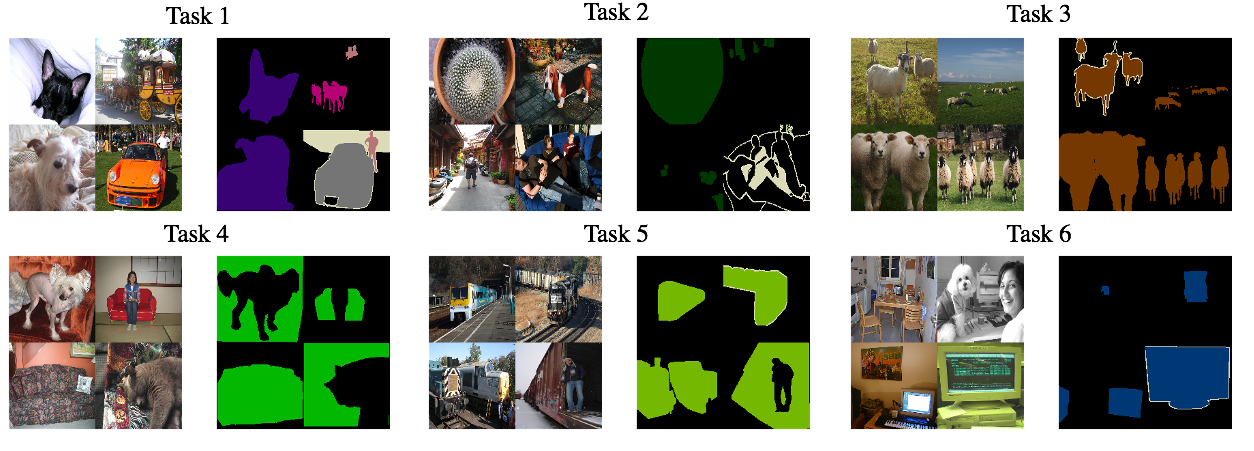

`ClassIncremental` is not the only scenario we propose. For example, the `InstanceIncremental` scenario consists of learning several tasks with the same classes, but the task data are always different.  

Famous examples of instance incremental scenarios are permuted MNIST and rotated MNIST.

In permuted MNIST, each task contains all MNIST data with a fixed permutation of pixels, but each task has a different permutation. In the following code snippet, we create a 5 tasks permuted MNIST scenario. The scenario created  with class `Permutation` can be used like previously with the `ClassIncremental` scenario. 

NB: The `Permutation` scenario is a scpecial case of `InstanceIncremental` scenario.

In [5]:
from continuum import Permutations
from continuum.datasets import MNIST

train_dataset = MNIST(".", download=True, train=True)
train_scenario = Permutations(cl_dataset=dataset, nb_tasks=5)

# create test scenario with all test data in a single tasks
test_dataset = MNIST(".", download=True, train=True)
test_scenario = Permutations(cl_dataset=dataset, nb_tasks=5)

# Logging with [Continuum](https://github.com/Continvvm/continuum)

**Continuum** also proposes tools to log algorithms' performance and compute easily various continual learning metrics.

In [ ]:
import torch
from continuum.metrics import Logger 
from torch.utils.data import DataLoader

logger = Logger()

# training
for taskset in train_scenario:
    loader = DataLoader(taskset, batch_size=64)
    for (x,y,t) in loader:
        #predictions = model(x,y,t) # if we had a model, we could get a prediction
        # we will assume here the model is perfect, therefore,
        # we replace the prediction by the expected labels
        preds = y
        logger.add([preds, y, t])
    print(f"Online accuracy on train: {logger.online_accuracy*100} %")

# evaluation
for taskset in test_scenario:
    loader = DataLoader(taskset, batch_size=64)
    for (x,y,t) in loader:
        #once again we have perfect prediction
        preds = y
        logger.add([preds, y, t], subset='test')
    print(f"Test Accuracy: {logger.accuracy*100} %")

Online accuracy on train: 100.0 %
Online accuracy on train: 100.0 %
Online accuracy on train: 100.0 %
Online accuracy on train: 100.0 %
Online accuracy on train: 100.0 %
Test Accuracy: 100.0 %
Test Accuracy: 100.0 %
Test Accuracy: 100.0 %
Test Accuracy: 100.0 %


The **continuum** logger can be used to calculate several other continual learning metrics:

<table>
<col width="44%" />
<col width="41%" />
<col width="11%" />
<thead>
<tr class="header">
<th align="left">Name</th>
<th align="left">Code</th>
<th align="left">↑ / ↓</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td align="left"><strong>Accuracy</strong></td>
<td align="left">accuracy</td>
<td align="left"><blockquote>
<p>↑</p>
</blockquote></td>
</tr>
<tr class="even">
<td align="left"><strong>Accuracy A</strong></td>
<td align="left">accuracy_A</td>
<td align="left"><blockquote>
<p>↑</p>
</blockquote></td>
</tr>
<tr class="odd">
<td align="left"><strong>Backward Transfer</strong></td>
<td align="left">backward_transfer</td>
<td align="left"><blockquote>
<p>↑</p>
</blockquote></td>
</tr>
<tr class="even">
<td align="left"><strong>Positive Backward Transfer</strong></td>
<td align="left">positive_backward_transfer</td>
<td align="left"><blockquote>
<p>↑</p>
</blockquote></td>
</tr>
<tr class="odd">
<td align="left"><strong>Remembering</strong></td>
<td align="left">remembering</td>
<td align="left"><blockquote>
<p>↑</p>
</blockquote></td>
</tr>
<tr class="even">
<td align="left"><strong>Forward Transfer</strong></td>
<td align="left">forward_transfer</td>
<td align="left"><blockquote>
<p>↑</p>
</blockquote></td>
</tr>
<tr class="odd">
<td align="left"><strong>Forgetting</strong></td>
<td align="left">forgetting</td>
<td align="left"><blockquote>
<p>↓</p>
</blockquote></td>
</tr>
<tr class="even">
<td align="left"><strong>Model Size Growth</strong></td>
<td align="left">model_size_growth</td>
<td align="left"><blockquote>
<p>↓</p>
</blockquote></td>
</tr>
<tr class="odd">
<td align="left"><strong>Online Accuracy</strong></td>
<td align="left">online_accuracy</td>
<td align="left"><blockquote>
<p>↑</p>
</blockquote></td>
</tr>
</tbody>
</table>

(Details [here](https://continuum.readthedocs.io/en/latest/_tutorials/metrics/metrics.html))

## Conclusion

[Continuum](https://github.com/Continvvm/continuum) is an open-source project which aims at simplifying data management for continual learning algorithms. It aims at covering the various types of scenarios in the continual learning research field, and it is developed such as being easily adaptable to specific needs.

Continuum is made to save development time, reduce code size in continual project, and avoid classical data loader bugs.

Moreover, we believe that using a common plateform for continual learning experiments will benefit the reproducibility problems that researchers often experiment with. We believe by providing the right tools, [Continuum](https://github.com/Continvvm/continuum) can enable better research in Continual Learning: several research papers already used this framework, and the Continual Learning workshop of CVPR 2021 will hold a competition where the participants will also have to use Continuum.